In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
data = pd.read_csv('해삼.csv')
data['ds'] = pd.to_datetime(data['기간'])  # 'ds' 컬럼을 날짜 형식으로 변환
data.rename(columns={'단가': 'y'}, inplace=True)  # 종속 변수 컬럼 이름을 'y'로 변경

In [3]:
model1 = Prophet(seasonality_prior_scale=1)
model1.fit(data)

00:22:01 - cmdstanpy - INFO - Chain [1] start processing
00:22:01 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = model1.make_future_dataframe(periods=12, freq='M')  # 향후 12개월의 날짜 생성
forecast = model1.predict(future)

In [5]:
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
25,2023-02-28,12563.132133,4913.536711,20609.987866
26,2023-03-31,19638.205949,12041.252879,27692.167261
27,2023-04-30,24698.116820,16530.691819,32783.132373
28,2023-05-31,21310.852798,13195.670707,29367.409556
29,2023-06-30,0.000000,-12832.676140,2102.780756
30,2023-07-31,18143.003191,10709.975877,26017.942375
31,2023-08-31,19060.878569,11007.287260,26864.017271
32,2023-09-30,23808.826581,15876.035997,31482.670242
33,2023-10-31,17669.439993,10074.744154,25326.407053
34,2023-11-30,10043.379330,2470.165230,17940.588975


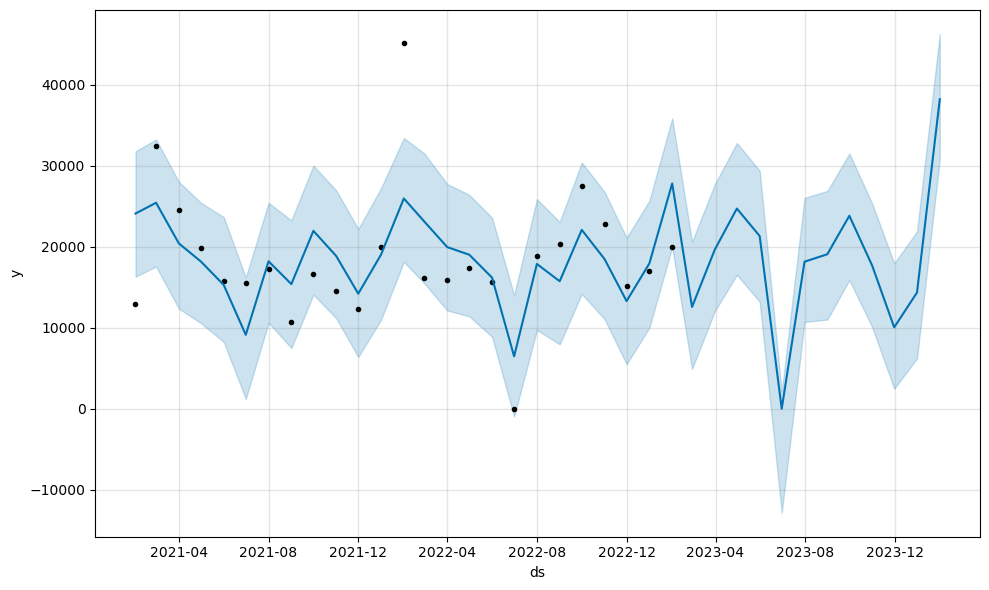

In [7]:
fig1 = model1.plot(forecast)

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_csv('해삼.csv')

In [10]:
quantity = data['물량-평균'].values
price = data['단가'].values

In [11]:
model = LinearRegression()
model.fit(quantity.reshape(-1, 1), price)

LinearRegression()

In [12]:
print("물량과 가격 분석 결과:")
print("기울기 (회귀 계수):", model.coef_[0])
print("절편 (절편 값):", model.intercept_)

물량과 가격 분석 결과:
기울기 (회귀 계수): -200.47241094381184
절편 (절편 값): 20540.48852368711


In [13]:
future_quantity = 5 # 예측할 물량
predicted_price = model.predict([[future_quantity]])

In [16]:
print("물량에 따른 예측 가격:")
print("물량:", future_quantity)
print("예측 가격:", predicted_price[0])

물량에 따른 예측 가격:
물량: 5
예측 가격: 23246.449218750004


In [8]:
data = pd.read_csv('해삼.csv')
data['ds'] = pd.to_datetime(data['기간'])  # 'ds' 컬럼을 날짜 형식으로 변환
data.rename(columns={'물량-평균': 'y', '단가': 'price'}, inplace=True)  # 종속 변수 컬럼 이름을 'y'로, 가격 컬럼 이름은 'price'로 변경

In [9]:
model = Prophet()
model.add_regressor('price')  # 가격을 추가 regressor로 사용
model.fit(data)

00:28:15 - cmdstanpy - INFO - Chain [1] start processing
00:28:15 - cmdstanpy - INFO - Chain [1] done processing


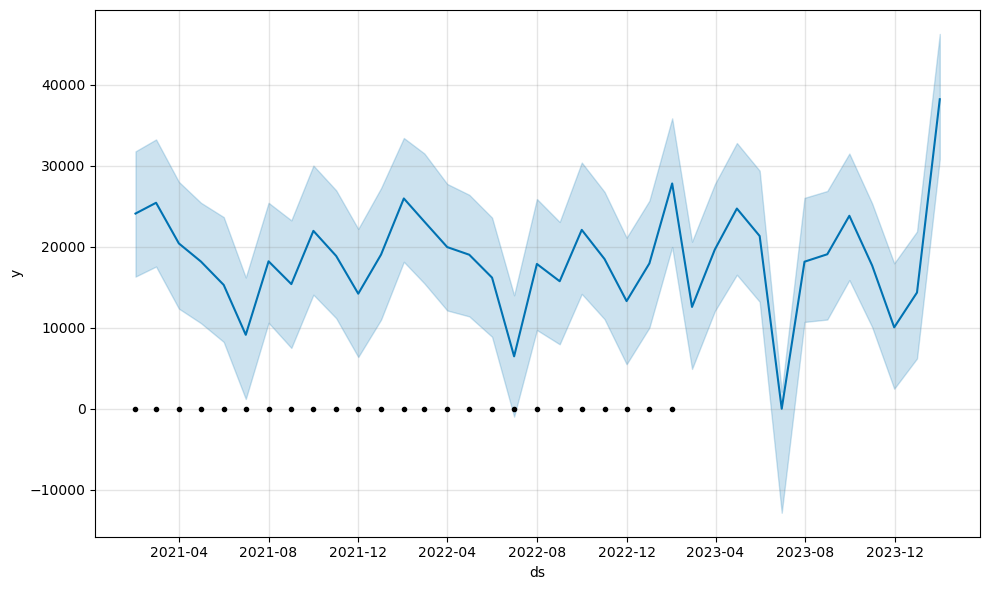

In [10]:
fig1 = model.plot(forecast)